Importing necessery libraries

In [1]:
pip install pygad

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pygad
import time
import random
import pandas as pd
import matplotlib.pyplot as plt

# BOARD PREPARATION

Board will be obviously 9x9. I will fill every space with 0 for now.

In [3]:
empty = np.zeros(shape=(9,9), dtype=int)
print(empty)

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


As seen above, it doesn't really look like your typical Sudoku board. Mainly it lacks 3x3 separation.

In [4]:
def pretty_board(board):
    #'assert' allows to make certain assumptions    
    assert board.shape == (9, 9)  #board is a 9x9 square
    assert type(board) == np.ndarray #ndarray is multi-dimentional array
    
    board_string = board.astype(str) #converting values to string
    
    #I want rows to be separated by '-'
    #By trail and error, I came into a conclusion that 25 dashes is a perfect number for board to look most visually pleasing
    row_separator = '-'*25

    for i in range(9):
        
        #After every three rows, there should be '-' separator
        if i % 3 == 0:
            print(row_separator)

        row = board_string[i]
        
        #For every row, '|' separator is added after every third value
        print('| '+' '.join(row[0:3])+' | '+' '.join(row[3:6])+' | '+' '.join(row[6:])+' |')

    print(row_separator)
    

# PREPARING INPUTS

Easy level

The difference between each level is number of missing values.

In [5]:
#Making a copy of empty board
board_easy1 = empty.copy()

#Filling in known values
board_easy1[0, :] = [0, 2, 0, 4, 5, 6, 7, 8, 9]
board_easy1[1, :] = [4, 5, 7, 0, 8, 0, 2, 3, 6]
board_easy1[2, :] = [6, 8, 9, 2, 3, 7, 0, 4, 0]
board_easy1[3, :] = [0, 0, 5, 3, 6, 2, 9, 7, 4]
board_easy1[4, :] = [2, 7, 4, 0, 9, 0, 6, 5, 3]
board_easy1[5, :] = [3, 9, 6, 5, 7, 4, 8, 0, 0]
board_easy1[6, :] = [0, 4, 0, 6, 1, 8, 3, 9, 7]
board_easy1[7, :] = [7, 6, 1, 0, 4, 0, 5, 2, 8]
board_easy1[8, :] = [9, 3, 8, 7, 2, 5, 0, 6, 0]

pretty_board(board_easy1)

#source: https://sudokuessentials.com/sudoku_for_kids/

correct_easy1 = [1, 3, 1, 9, 1, 5, 8, 1, 8, 1, 1, 2, 5, 2, 9, 3, 4, 1]

#no. of missing values: 18.

-------------------------
| 0 2 0 | 4 5 6 | 7 8 9 |
| 4 5 7 | 0 8 0 | 2 3 6 |
| 6 8 9 | 2 3 7 | 0 4 0 |
-------------------------
| 0 0 5 | 3 6 2 | 9 7 4 |
| 2 7 4 | 0 9 0 | 6 5 3 |
| 3 9 6 | 5 7 4 | 8 0 0 |
-------------------------
| 0 4 0 | 6 1 8 | 3 9 7 |
| 7 6 1 | 0 4 0 | 5 2 8 |
| 9 3 8 | 7 2 5 | 0 6 0 |
-------------------------


In [6]:
board_easy2 = empty.copy()

board_easy2[0, :] = [5, 0, 0, 4, 6, 7, 3, 0, 9]
board_easy2[1, :] = [9, 0, 3, 8, 1, 0, 4, 2, 7]
board_easy2[2, :] = [1, 7, 4, 2, 0, 3, 0, 0, 0]
board_easy2[3, :] = [2, 3, 1, 9, 7, 6, 8, 5, 4]
board_easy2[4, :] = [8, 5, 7, 1, 2, 4, 0, 9, 0]
board_easy2[5, :] = [4, 9, 6, 3, 0, 8, 1, 7, 2]
board_easy2[6, :] = [0, 0, 0, 0, 8, 9, 2, 6, 0]
board_easy2[7, :] = [7, 8, 2, 6, 4, 1, 0, 0, 5]
board_easy2[8, :] = [0, 1, 0, 0, 0, 0, 7, 0, 8]

pretty_board(board_easy2)

#source: https://www.puzzles-to-print.com/printable-sudokus/easy-beginner-sudoku.shtml

correct_easy2 = [2, 8, 1, 6, 5, 9, 5, 8, 6, 6, 3, 5, 3, 4, 5, 7, 1, 9, 3, 6, 9, 5, 3, 2, 4]

#no. of missing values: 25.

-------------------------
| 5 0 0 | 4 6 7 | 3 0 9 |
| 9 0 3 | 8 1 0 | 4 2 7 |
| 1 7 4 | 2 0 3 | 0 0 0 |
-------------------------
| 2 3 1 | 9 7 6 | 8 5 4 |
| 8 5 7 | 1 2 4 | 0 9 0 |
| 4 9 6 | 3 0 8 | 1 7 2 |
-------------------------
| 0 0 0 | 0 8 9 | 2 6 0 |
| 7 8 2 | 6 4 1 | 0 0 5 |
| 0 1 0 | 0 0 0 | 7 0 8 |
-------------------------


In [7]:
board_easy3 = empty.copy()

board_easy3[0, :] = [3, 0, 2, 9, 6, 4, 8, 5, 1]
board_easy3[1, :] = [9, 0, 4, 8, 1, 5, 0, 7, 0]
board_easy3[2, :] = [0, 0, 1, 3, 7, 2, 0, 9, 6]
board_easy3[3, :] = [0, 4, 0, 1, 0, 9, 0, 2, 8]
board_easy3[4, :] = [1, 0, 9, 0, 4, 6, 0, 0, 5]
board_easy3[5, :] = [5, 2, 0, 7, 0, 3, 0, 1, 4]
board_easy3[6, :] = [2, 0, 8, 6, 0, 1, 5, 4, 7]
board_easy3[7, :] = [4, 1, 0, 0, 3, 0, 2, 0, 0]
board_easy3[8, :] = [0, 0, 5, 0, 0, 7, 1, 0, 3]

pretty_board(board_easy3)

#source: https://www.mathinenglish.com/puzzlessudoku.php?pstid=605

correct_easy3 = [7, 6, 3, 2, 8, 5, 4, 7, 3, 5, 6, 8, 2, 7, 3, 6, 8, 9, 3, 9, 7, 5, 8, 6, 9, 6, 9, 4, 2, 8]

#no. of missing values - 30.

-------------------------
| 3 0 2 | 9 6 4 | 8 5 1 |
| 9 0 4 | 8 1 5 | 0 7 0 |
| 0 0 1 | 3 7 2 | 0 9 6 |
-------------------------
| 0 4 0 | 1 0 9 | 0 2 8 |
| 1 0 9 | 0 4 6 | 0 0 5 |
| 5 2 0 | 7 0 3 | 0 1 4 |
-------------------------
| 2 0 8 | 6 0 1 | 5 4 7 |
| 4 1 0 | 0 3 0 | 2 0 0 |
| 0 0 5 | 0 0 7 | 1 0 3 |
-------------------------


Medium level

In [8]:
board_medium1 = empty.copy()

#Wpisuję liczby
board_medium1[0, :] = [0, 1, 8, 0, 0, 2, 3, 0, 4]
board_medium1[1, :] = [0, 0, 3, 5, 0, 0, 0, 0, 0]
board_medium1[2, :] = [5, 2, 4, 8, 9, 0, 0, 0, 0]
board_medium1[3, :] = [1, 0, 5, 0, 7, 0, 4, 0, 6]
board_medium1[4, :] = [0, 0, 7, 0, 0, 0, 9, 0, 0]
board_medium1[5, :] = [2, 0, 9, 0, 4, 0, 5, 0, 8]
board_medium1[6, :] = [0, 0, 0, 0, 8, 9, 6, 4, 3]
board_medium1[7, :] = [0, 0, 0, 0, 0, 7, 2, 0, 0]
board_medium1[8, :] = [3, 0, 1, 6, 0, 0, 7, 8, 0]

pretty_board(board_medium1)

#source: https://www.dreamstime.com/illustration/sudoku.html

correct_medium1 = [9, 7, 6, 5, 6, 7, 1, 4, 8, 9, 2, 3, 1, 6, 7, 3, 9, 8, 2, 4, 8, 2, 5, 6, 3, 1, 6, 3, 1, 7, 7, 5, 2, 1, 8, 9, 6, 4, 3, 1, 5, 4, 2, 5, 9]

#no. of missing values: 39

-------------------------
| 0 1 8 | 0 0 2 | 3 0 4 |
| 0 0 3 | 5 0 0 | 0 0 0 |
| 5 2 4 | 8 9 0 | 0 0 0 |
-------------------------
| 1 0 5 | 0 7 0 | 4 0 6 |
| 0 0 7 | 0 0 0 | 9 0 0 |
| 2 0 9 | 0 4 0 | 5 0 8 |
-------------------------
| 0 0 0 | 0 8 9 | 6 4 3 |
| 0 0 0 | 0 0 7 | 2 0 0 |
| 3 0 1 | 6 0 0 | 7 8 0 |
-------------------------


In [9]:
board_medium2 = empty.copy()

#Wpisuję liczby
board_medium2[0, :] = [9, 0, 6, 0, 0, 1, 0, 4, 0]
board_medium2[1, :] = [7, 0, 1, 2, 9, 0, 0, 6, 0]
board_medium2[2, :] = [4, 0, 2, 8, 0, 6, 3, 0, 0]
board_medium2[3, :] = [0, 0, 0, 0, 2, 0, 9, 8, 0]
board_medium2[4, :] = [6, 0, 0, 0, 0, 0, 0, 0, 2]
board_medium2[5, :] = [0, 9, 4, 0, 8, 0, 0, 0, 0]
board_medium2[6, :] = [0, 0, 3, 7, 0, 8, 4, 0, 9]
board_medium2[7, :] = [0, 4, 0, 0, 1, 3, 7, 0, 6]
board_medium2[8, :] = [0, 6, 0, 9, 0, 0, 1, 0, 8]

pretty_board(board_medium2)

#source: https://www.sudokuoftheday.com/free/

correct_medium2 = [8, 3, 5, 2, 7, 3, 4, 8, 5, 5, 7, 9, 1, 3, 1, 5, 6, 7, 4, 7, 8, 4, 3, 9, 5, 1, 2, 1, 5, 6, 7, 3, 1, 2, 6, 5, 8, 9, 5, 2, 5, 7, 4, 2, 3]

#no. of missing values: 45


-------------------------
| 9 0 6 | 0 0 1 | 0 4 0 |
| 7 0 1 | 2 9 0 | 0 6 0 |
| 4 0 2 | 8 0 6 | 3 0 0 |
-------------------------
| 0 0 0 | 0 2 0 | 9 8 0 |
| 6 0 0 | 0 0 0 | 0 0 2 |
| 0 9 4 | 0 8 0 | 0 0 0 |
-------------------------
| 0 0 3 | 7 0 8 | 4 0 9 |
| 0 4 0 | 0 1 3 | 7 0 6 |
| 0 6 0 | 9 0 0 | 1 0 8 |
-------------------------


In [10]:
board_medium3 = empty.copy()

#Wpisuję liczby
board_medium3[0, :] = [0, 1, 8, 0, 0, 2, 3, 0, 4]
board_medium3[1, :] = [0, 0, 3, 5, 0, 0, 0, 0, 0]
board_medium3[2, :] = [5, 2, 4, 8, 9, 0, 0, 0, 0]
board_medium3[3, :] = [1, 0, 5, 0, 7, 0, 4, 0, 6]
board_medium3[4, :] = [0, 0, 7, 0, 0, 0, 9, 0, 0]
board_medium3[5, :] = [2, 0, 9, 0, 4, 0, 5, 0, 8]
board_medium3[6, :] = [0, 0, 0, 0, 8, 9, 6, 4, 3]
board_medium3[7, :] = [0, 0, 0, 0, 0, 7, 2, 0, 0]
board_medium3[8, :] = [3, 0, 1, 6, 0, 0, 7, 8, 0]

pretty_board(board_medium3)

#source: https://www.sudokuoftheday.com/

correct_medium3 = [9, 7, 6, 5, 6, 7, 1, 4, 8, 9, 2, 3, 1, 6, 7, 3, 9, 8, 2, 4, 8, 2, 5, 6, 3, 1, 6, 3, 1, 7, 7, 5, 2, 1, 8, 9, 6, 4, 3, 1, 5, 4, 2, 5, 9]

#no. of missing values: 45

-------------------------
| 0 1 8 | 0 0 2 | 3 0 4 |
| 0 0 3 | 5 0 0 | 0 0 0 |
| 5 2 4 | 8 9 0 | 0 0 0 |
-------------------------
| 1 0 5 | 0 7 0 | 4 0 6 |
| 0 0 7 | 0 0 0 | 9 0 0 |
| 2 0 9 | 0 4 0 | 5 0 8 |
-------------------------
| 0 0 0 | 0 8 9 | 6 4 3 |
| 0 0 0 | 0 0 7 | 2 0 0 |
| 3 0 1 | 6 0 0 | 7 8 0 |
-------------------------


Hard level

In [11]:
board_hard1 = empty.copy()

#Wpisuję liczby
board_hard1[0, :] = [0, 0, 4, 8, 0, 5, 7, 0, 6]
board_hard1[1, :] = [0, 0, 0, 9, 0, 0, 0, 4, 0]
board_hard1[2, :] = [0, 2, 0, 4, 0, 0, 0, 0, 1]
board_hard1[3, :] = [8, 0, 0, 7, 0, 3, 0, 6, 0]
board_hard1[4, :] = [0, 0, 6, 0, 0, 1, 5, 0, 0]
board_hard1[5, :] = [2, 0, 0, 0, 0, 8, 4, 7, 0]
board_hard1[6, :] = [0, 4, 0, 5, 0, 6, 0, 0, 0]
board_hard1[7, :] = [5, 0, 0, 0, 0, 0, 6, 8, 0]
board_hard1[8, :] = [0, 0, 0, 1, 0, 0, 0, 5, 4]

pretty_board(board_hard1)

#source: https://sudoku.com/pl/
correct_hard1 = [9, 3, 1, 2, 1, 8, 7, 6, 2, 3, 6, 5, 3, 7, 8, 9, 5, 9, 4, 1, 2, 4, 7, 2, 9, 3, 8, 1, 3, 6, 5, 9, 7, 2, 8, 9, 1, 3, 9, 1, 3, 2, 4, 7, 3, 6, 8, 7, 9, 2]

#no. of missing values: 51


-------------------------
| 0 0 4 | 8 0 5 | 7 0 6 |
| 0 0 0 | 9 0 0 | 0 4 0 |
| 0 2 0 | 4 0 0 | 0 0 1 |
-------------------------
| 8 0 0 | 7 0 3 | 0 6 0 |
| 0 0 6 | 0 0 1 | 5 0 0 |
| 2 0 0 | 0 0 8 | 4 7 0 |
-------------------------
| 0 4 0 | 5 0 6 | 0 0 0 |
| 5 0 0 | 0 0 0 | 6 8 0 |
| 0 0 0 | 1 0 0 | 0 5 4 |
-------------------------


In [12]:
board_hard2 = empty.copy()

#Wpisuję liczby
board_hard2[0, :] = [0, 0, 0, 0, 0, 0, 6, 8, 0]
board_hard2[1, :] = [0, 0, 0, 0, 7, 3, 0, 0, 9]
board_hard2[2, :] = [3, 0, 9, 0, 0, 0, 0, 4, 5]
board_hard2[3, :] = [4, 9, 0, 0, 0, 0, 0, 0, 0]
board_hard2[4, :] = [8, 0, 3, 0, 5, 0, 9, 0, 2]
board_hard2[5, :] = [0, 0, 0, 0, 0, 0, 0, 3, 6]
board_hard2[6, :] = [9, 6, 0, 0, 0, 0, 3, 0, 8]
board_hard2[7, :] = [7, 0, 0, 6, 8, 0, 0, 0, 0]
board_hard2[8, :] = [0, 2, 8, 0, 0, 0, 0, 0, 0]

pretty_board(board_hard2)

#source: https://www.websudoku.com/images/example-steps.html

correct_hard2 = [1, 7, 2, 5, 4, 9, 3, 6, 4, 5, 8, 2, 1, 8, 2, 6, 1, 7, 6, 3, 2, 7, 8, 5, 1, 1, 4, 6, 7, 2, 5, 7, 1, 9, 8, 4, 4, 7, 1, 5, 2, 3, 1, 2, 5, 9, 4, 5, 9, 3, 4, 1, 6, 7]

#no. of missing values: 54


-------------------------
| 0 0 0 | 0 0 0 | 6 8 0 |
| 0 0 0 | 0 7 3 | 0 0 9 |
| 3 0 9 | 0 0 0 | 0 4 5 |
-------------------------
| 4 9 0 | 0 0 0 | 0 0 0 |
| 8 0 3 | 0 5 0 | 9 0 2 |
| 0 0 0 | 0 0 0 | 0 3 6 |
-------------------------
| 9 6 0 | 0 0 0 | 3 0 8 |
| 7 0 0 | 6 8 0 | 0 0 0 |
| 0 2 8 | 0 0 0 | 0 0 0 |
-------------------------


In [13]:
board_hard3 = empty.copy()

#Wpisuję liczby
board_hard3[0, :] = [7, 0, 1, 0, 2, 6, 0, 0, 0]
board_hard3[1, :] = [0, 0, 6, 0, 0, 0, 1, 0, 5]
board_hard3[2, :] = [0, 0, 0, 3, 1, 0, 0, 2, 6]
board_hard3[3, :] = [0, 0, 0, 8, 9, 5, 2, 6, 7]
board_hard3[4, :] = [9, 8, 0, 0, 0, 0, 0, 5, 0]
board_hard3[5, :] = [0, 0, 0, 0, 0, 0, 0, 9, 0]
board_hard3[6, :] = [0, 0, 8, 9, 0, 4, 6, 1, 0]
board_hard3[7, :] = [5, 0, 0, 7, 6, 0, 0, 0, 9]
board_hard3[8, :] = [0, 0, 9, 0, 3, 0, 0, 0, 0]

pretty_board(board_hard3)

#source: https://sudoku.com/pl/

correct_hard3 = [3, 5, 9, 4, 8, 2, 9, 4, 8, 7, 3, 8, 4, 5, 9, 7, 4, 1, 3, 2, 6, 7, 3, 4, 1, 6, 5, 7, 1, 4, 2, 8, 3, 3, 7, 5, 2, 2, 4, 1, 3, 8, 1, 6, 2, 8, 5, 7, 4]

#no. of missing values: 49


-------------------------
| 7 0 1 | 0 2 6 | 0 0 0 |
| 0 0 6 | 0 0 0 | 1 0 5 |
| 0 0 0 | 3 1 0 | 0 2 6 |
-------------------------
| 0 0 0 | 8 9 5 | 2 6 7 |
| 9 8 0 | 0 0 0 | 0 5 0 |
| 0 0 0 | 0 0 0 | 0 9 0 |
-------------------------
| 0 0 8 | 9 0 4 | 6 1 0 |
| 5 0 0 | 7 6 0 | 0 0 9 |
| 0 0 9 | 0 3 0 | 0 0 0 |
-------------------------


# FIRST METHOD

First step is to find indices of missing values in every board. In my board missing values are written as zeroes.

In [14]:
board_easy1_copy = board_easy1.copy()
temp_easy1 = np.where(board_easy1_copy == 0)
blank_indices_easy1=np.asarray(temp_easy1).T

board_easy2_copy = board_easy2.copy()
temp_easy2 = np.where(board_easy2_copy == 0)
blank_indices_easy2=np.asarray(temp_easy2).T

board_easy3_copy = board_easy3.copy()
temp_easy3 = np.where(board_easy3_copy == 0)
blank_indices_easy3=np.asarray(temp_easy3).T



board_medium1_copy = board_medium1.copy()
temp_medium1 = np.where(board_medium1_copy == 0)
blank_indices_medium1=np.asarray(temp_medium1).T

board_medium2_copy = board_medium2.copy()
temp_medium2 = np.where(board_medium2_copy == 0)
blank_indices_medium2=np.asarray(temp_medium2).T

board_medium3_copy = board_medium3.copy()
temp_medium3 = np.where(board_medium3_copy == 0)
blank_indices_medium3=np.asarray(temp_medium3).T



board_hard1_copy = board_hard1.copy()
temp_hard1 = np.where(board_hard1_copy == 0)
blank_indices_hard1=np.asarray(temp_hard1).T

board_hard2_copy = board_hard2.copy()
temp_hard2 = np.where(board_hard2_copy == 0)
blank_indices_hard2=np.asarray(temp_hard2).T

board_hard3_copy = board_hard3.copy()
temp_hard3 = np.where(board_hard3_copy == 0)
blank_indices_hard3=np.asarray(temp_hard3).T

Visualisation of how array of blank indices looks.

In [15]:
blank_indices_medium1

array([[0, 0],
       [0, 3],
       [0, 4],
       [0, 7],
       [1, 0],
       [1, 1],
       [1, 4],
       [1, 5],
       [1, 6],
       [1, 7],
       [1, 8],
       [2, 5],
       [2, 6],
       [2, 7],
       [2, 8],
       [3, 1],
       [3, 3],
       [3, 5],
       [3, 7],
       [4, 0],
       [4, 1],
       [4, 3],
       [4, 4],
       [4, 5],
       [4, 7],
       [4, 8],
       [5, 1],
       [5, 3],
       [5, 5],
       [5, 7],
       [6, 0],
       [6, 1],
       [6, 2],
       [6, 3],
       [7, 0],
       [7, 1],
       [7, 2],
       [7, 3],
       [7, 4],
       [7, 7],
       [7, 8],
       [8, 1],
       [8, 4],
       [8, 5],
       [8, 8]], dtype=int64)

GENETIC ALGORITHM

Solution will be presented as an array of written in values on blank indices (by rows).

Fitness function will check for basic sudoku rules, i. e. whether solution[i] already appears in current row/column/block.

Unfortunately, I don't know how to correctly implement all 9 boards into one fitness function (I am not even sure if that's possible as I haven't found much during research). That means I will be using nine different finess functions which differ by board and blank indices array only.


In [16]:
gene_space = [1, 2, 3, 4, 5, 6, 7, 8, 9] #every possible number one can write into sudoku puzzle


def fitness_func_easy1(solution, solution_idx):
    global board_easy1
    global blank_indices_easy1
    global gene_space
    
    rows_blank = blank_indices_easy1[:,0]
    columns_blank = blank_indices_easy1[:,1]
    fitness = 0
    
    for i in range(len(blank_indices_easy1)):
        #checking for value in current row
        if solution[i] in board_easy1[rows_blank[i], :]:
            fitness -= 100
        else:
            fitness += 100
        #checking for value in current column
        if solution[i] in board_easy1[:, columns_blank[i]]:
            fitness -= 100
        else:
            fitness += 100
            
        #checking for value in current block (3x3)
        x = (columns_blank[i] // 3) * 3  #thanks to floor division I can separate board into three sectors 
        y = (rows_blank[i] // 3) * 3
        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_easy1[y+a][x+j]:
                    fitness -= 100
                else:
                    fitness += 100

    return fitness

            
def fitness_func_easy2(solution, solution_idx):
    global board_easy2
    global blank_indices_easy2
    global gene_space
    
    rows_blank = blank_indices_easy2[:,0]
    columns_blank = blank_indices_easy2[:,1]
    fitness = 0
    
    for i in range(len(blank_indices_easy2)):
        if solution[i] in board_easy2[rows_blank[i], :]:
            fitness -= 100
        else:
            fitness += 100
        if solution[i] in board_easy2[:, columns_blank[i]]:
            fitness -= 100
        else:
            fitness += 100
            
        x = (columns_blank[i] // 3) * 3 
        y = (rows_blank[i] // 3) * 3
        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_easy2[y+a][x+j]:
                    fitness -= 100
                else:
                    fitness += 100

    return fitness


def fitness_func_easy3(solution, solution_idx):
    global board_easy3
    global blank_indices_easy3
    global gene_space
    
    rows_blank = blank_indices_easy3[:,0]
    columns_blank = blank_indices_easy3[:,1]
    fitness = 0
    
    for i in range(len(blank_indices_easy3)):
        if solution[i] in board_easy3[rows_blank[i], :]:
            fitness -= 100
        else:
            fitness += 100
        if solution[i] in board_easy3[:, columns_blank[i]]:
            fitness -= 100
        else:
            fitness += 100
            
        x = (columns_blank[i] // 3) * 3  
        y = (rows_blank[i] // 3) * 3
        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_easy3[y+a][x+j]:
                    fitness -= 100
                else:
                    fitness += 100

    return fitness

In [17]:
def fitness_func_medium1(solution, solution_idx):
    global board_medium1
    global blank_indices_medium1
    global gene_space
    
    rows_blank = blank_indices_medium1[:,0]
    columns_blank = blank_indices_medium1[:,1]
    fitness = 0
    
    for i in range(len(blank_indices_medium1)):
        if solution[i] in board_medium1[rows_blank[i], :]:
            fitness -= 100
        else:
            fitness += 100
        if solution[i] in board_medium1[:, columns_blank[i]]:
            fitness -= 100
        else:
            fitness += 100
            
        x = (columns_blank[i] // 3) * 3   
        y = (rows_blank[i] // 3) * 3
        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_medium1[y+a][x+j]:
                    fitness -= 100
                else:
                    fitness += 100

    return fitness


def fitness_func_medium2(solution, solution_idx):
    global board_medium2
    global blank_indices_medium2
    global gene_space
    
    rows_blank = blank_indices_medium2[:,0]
    columns_blank = blank_indices_medium2[:,1]
    fitness = 0
    
    for i in range(len(blank_indices_medium2)):
        if solution[i] in board_medium2[rows_blank[i], :]:
            fitness -= 100
        else:
            fitness += 100
        if solution[i] in board_medium2[:, columns_blank[i]]:
            fitness -= 100
        else:
            fitness += 100
            
        x = (columns_blank[i] // 3) * 3  
        y = (rows_blank[i] // 3) * 3
        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_medium2[y+a][x+j]:
                    fitness -= 100
                else:
                    fitness += 100

    return fitness


def fitness_func_medium3(solution, solution_idx):
    global board_medium3
    global blank_indices_medium3
    global gene_space
    
    rows_blank = blank_indices_medium3[:,0]
    columns_blank = blank_indices_medium3[:,1]
    fitness = 0
    
    for i in range(len(blank_indices_medium3)):
        if solution[i] in board_medium3[rows_blank[i], :]:
            fitness -= 100
        else:
            fitness += 100
        if solution[i] in board_medium3[:, columns_blank[i]]:
            fitness -= 100
        else:
            fitness += 100
            
        x = (columns_blank[i] // 3) * 3  
        y = (rows_blank[i] // 3) * 3
        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_medium3[y+a][x+j]:
                    fitness -= 100
                else:
                    fitness += 100

    return fitness

In [18]:
def fitness_func_hard1(solution, solution_idx):
    global board_hard1
    global blank_indices_hard1
    global gene_space
    
    rows_blank = blank_indices_hard1[:,0]
    columns_blank = blank_indices_hard1[:,1]
    fitness = 0
    
    for i in range(len(blank_indices_hard1)):
        if solution[i] in board_hard1[rows_blank[i], :]:
            fitness -= 100
        else:
            fitness += 100
        if solution[i] in board_hard1[:, columns_blank[i]]:
            fitness -= 100
        else:
            fitness += 100
            
        x = (columns_blank[i] // 3) * 3  
        y = (rows_blank[i] // 3) * 3
        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_hard1[y+a][x+j]:
                    fitness -= 100
                else:
                    fitness += 100

    return fitness

def fitness_func_hard2(solution, solution_idx):
    global board_hard2
    global blank_indices_hard2
    global gene_space
    
    rows_blank = blank_indices_hard2[:,0]
    columns_blank = blank_indices_hard2[:,1]
    fitness = 0
    
    for i in range(len(blank_indices_hard2)):
        if solution[i] in board_hard2[rows_blank[i], :]:
            fitness -= 100
        else:
            fitness += 100
        if solution[i] in board_hard2[:, columns_blank[i]]:
            fitness -= 100
        else:
            fitness += 100
            
        x = (columns_blank[i] // 3) * 3  
        y = (rows_blank[i] // 3) * 3
        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_hard2[y+a][x+j]:
                    fitness -= 100
                else:
                    fitness += 100

    return fitness


def fitness_func_hard3(solution, solution_idx):
    global board_hard3
    global blank_indices_hard3
    global gene_space
    
    rows_blank = blank_indices_hard3[:,0]
    columns_blank = blank_indices_hard3[:,1]
    fitness = 0
    
    for i in range(len(blank_indices_hard3)):
        if solution[i] in board_hard3[rows_blank[i], :]:
            fitness -= 100
        else:
            fitness += 100
        if solution[i] in board_hard3[:, columns_blank[i]]:
            fitness -= 100
        else:
            fitness += 100
            
        x = (columns_blank[i] // 3) * 3  
        y = (rows_blank[i] // 3) * 3
        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_hard3[y+a][x+j]:
                    fitness -= 100
                else:
                    fitness += 100

    return fitness

I want to check how correct the genetic algorithm is.

In [19]:
#Function that compares pygad's best solutions with correct solution
def find_common(a1, a2):
    list_len = len(a1)
    a3 = 0
    i = j = 0
    for i in range(list_len):
        if a1[i] == a2[i]:
            a3 += 1
    return a3


Based on my current knowledge, I didn't think it was necessary to use any non-standard crossover types or mutation types.

# TEST FOR 100 EASY INPUTS

In [20]:
bestsol_easy_method1 = []
times_easy_method1 = []
counts_easy_method1 = []
times_perfect_easy_method1 = []
easy = [fitness_func_easy1, fitness_func_easy2, fitness_func_easy3]

blanks_easy = [blank_indices_easy1, blank_indices_easy2, blank_indices_easy3]

correct_easy = [correct_easy1, correct_easy2, correct_easy3]

for i in range(100):
    which_input = random.randint(0,2)
    fitness_func = easy[which_input]
    num_genes = len(blanks_easy[which_input])
    cor = correct_easy[which_input]
    
    ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=10,
                       num_parents_mating=100,
                       fitness_func=fitness_func,
                       sol_per_pop=200,
                       num_genes=num_genes,
                       parent_selection_type='random',
                       keep_parents=4,
                       crossover_type='single_point',
                       mutation_type='random',
                       mutation_percent_genes=8)

    start = time.time()
    ga_instance.run()
    end = time.time()
    times_easy_method1.append(end - start)

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    bestsol_easy_method1.append(solution)
    counts_easy_method1.append((find_common(cor, bestsol_easy_method1[i])/(num_genes))*100)
    if counts_easy_method1[i] == 100:
        times_perfect_easy_method1.append(times[i])


In [21]:
counts_easy_method1

[44.0,
 52.0,
 16.0,
 6.666666666666667,
 28.000000000000004,
 30.0,
 27.77777777777778,
 28.000000000000004,
 38.88888888888889,
 13.333333333333334]

As seen above, there wasn't any perfect solutions so the array with times of perfect solution should be empty.

In [22]:
times_perfect_easy_method1

[]

And it is, so code for counting best solution works.

# TEST FOR 100 MEDIUM INPUTS

In [23]:
bestsol_medium_method1 = []
times_medium_method1 = []
counts_medium_method1 = []
times_perfect_medium_method1 = []
medium = [fitness_func_medium1, fitness_func_medium2, fitness_func_medium3]

blanks_medium = [blank_indices_medium1, blank_indices_medium2, blank_indices_medium3]

correct_medium = [correct_medium1, correct_medium2, correct_medium3]

for i in range(100):
    which_input = random.randint(0,2)
    fitness_func = medium[which_input]
    num_genes = len(blanks_medium[which_input])
    cor = correct_medium[which_input]
    
    ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=10,
                       num_parents_mating=100,
                       fitness_func=fitness_func,
                       sol_per_pop=200,
                       num_genes=num_genes,
                       parent_selection_type='random',
                       keep_parents=4,
                       crossover_type='single_point',
                       mutation_type='random',
                       mutation_percent_genes=8)

    start = time.time()
    ga_instance.run()
    end = time.time()
    times_medium_method1.append(end - start)

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    bestsol_medium_method1.append(solution)
    counts_medium_method1.append((find_common(cor, bestsol_medium_method1[i])/(num_genes))*100)
    if counts_medium_method1[i] == 100:
        times_perfect_medium_method1.append(times[i])

In [24]:
counts_medium_method1

[22.22222222222222,
 17.77777777777778,
 17.77777777777778,
 28.888888888888886,
 17.77777777777778,
 15.555555555555555,
 24.444444444444443,
 20.0,
 17.77777777777778,
 24.444444444444443]

In [25]:
np.mean(times_medium_method1)

2.1183284759521483

In [26]:
times_perfect_medium_method1

[]

For medium level it looks even more tragic.

# TEST FOR 100 HARD LEVELS

In [27]:
bestsol_hard_method1 = []
times_hard_method1 = []
counts_hard_method1 = []
times_perfect_hard_method1 = []

hard = [fitness_func_hard1, fitness_func_hard2, fitness_func_hard3]

blanks_hard = [blank_indices_hard1, blank_indices_hard2, blank_indices_hard3]

correct_hard = [correct_hard1, correct_hard2, correct_hard3]

for i in range(100):
    which_input = random.randint(0,2)
    fitness_func = hard[which_input]
    num_genes = len(blanks_hard[which_input])
    cor = correct_hard[which_input]
    
    ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=10,
                       num_parents_mating=100,
                       fitness_func=fitness_func,
                       sol_per_pop=200,
                       num_genes=num_genes,
                       parent_selection_type='random',
                       keep_parents=4,
                       crossover_type='single_point',
                       mutation_type='random',
                       mutation_percent_genes=8)

    start = time.time()
    ga_instance.run()
    end = time.time()
    times_hard_method1.append(end - start)

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    bestsol_hard_method1.append(solution)
    counts_hard_method1.append((find_common(cor, bestsol_hard_method1[i])/(num_genes))*100)
    if counts_hard_method1[i] == 100:
        times_perfect_hard_method1.append(times[i])

In [28]:
counts_hard_method1

[16.3265306122449,
 16.3265306122449,
 12.244897959183673,
 18.51851851851852,
 13.725490196078432,
 20.37037037037037,
 16.3265306122449,
 13.725490196078432,
 3.9215686274509802,
 24.074074074074073]

In [29]:
np.mean(times_hard_method1)

2.421877884864807

In [30]:
times_perfect_hard_method1

[]

# SECOND METHOD

As we can clearly see, first method can't solve any sudoku correctly. My first thought was that it is because gene space consists of 9 numbers every time. However, when a human solves sudoku, they can see from the first glance that for every blank space there are numbers that can't be written in from the start. My solution for that problem is to write a function that will check for every possible value for every blank space even before starting the algorithm.

In [31]:
#Function that checks if number is in row/column/block - and if it's not, it's added to a list with potentail values for every 
#blank space

def potential_values(board,row,col):
    
    number_list = list()
    
    for number in range(1, 10):
        found = False #at first I assume that certain number is not in row/column/block
        #Checking row
        for i in range(9):
            if board[row][i] == number:
                found = True #If number is in row, I change found to True
                break
        #Checking column
        if found == True:
            continue #continue means that function skips current iteration and goes to the next one
            #in simple words - if a number appears in a row, I don't have to check the column, because it can't be a potential value
        else:
            for j in range(9):
                if board[j][col] ==number:
                    found = True
                    break
                    
        #Checking block
        if found == True:
            continue
        else:
            rowstart = 3 * (row // 3)
            colstart = 3 * (col // 3)
            rowend = rowstart + 3
            colend = colstart + 3
            
            for i in range(rowstart, rowend):
                for j in range(colstart, colend):
                    if board[i][j] == number:
                        found = True
                        break
                        
        if found == False:
            number_list.append(number)
    return number_list

In [32]:
#I want my program to scan the entire board and store potential values in a dictionary attached to its indices
#I think of it as writing in pencil while solving a sudoku - hence the pencil name
def pencil_values(board):
    pencil = dict() #I use dictionary because it is the best option to find searched values 
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                pencil[(i,j)] = potential_values(board,i,j)
    return pencil

Let's see how it looks for board_easy1:

In [33]:
pencil_values(board_easy1)

{(0, 0): [1],
 (0, 2): [3],
 (1, 3): [1, 9],
 (1, 5): [1, 9],
 (2, 6): [1],
 (2, 8): [1, 5],
 (3, 0): [1, 8],
 (3, 1): [1],
 (4, 3): [1, 8],
 (4, 5): [1],
 (5, 7): [1],
 (5, 8): [1, 2],
 (6, 0): [5],
 (6, 2): [2],
 (7, 3): [9],
 (7, 5): [3, 9],
 (8, 6): [1, 4],
 (8, 8): [1]}

It looks solid and accuarte.

Using a dictionary for the first time, I stumbled upon a problem on how to get access to values. Apparently, one have to make a list out of dictionary and then it's self-explanatory.

In [34]:
list(pencil_values(board_easy1).values())[2] #potential values for third blank space


[1, 9]

In [37]:
pencil_easy1 = pencil_values(board_easy1_copy)
pencil_easy2 = pencil_values(board_easy2_copy)
pencil_easy3 = pencil_values(board_easy3_copy)

pencil_medium1 = pencil_values(board_medium1)
pencil_medium2 = pencil_values(board_medium2)
pencil_medium3 = pencil_values(board_medium3)

pencil_hard1 = pencil_values(board_hard1)
pencil_hard2 = pencil_values(board_hard2)
pencil_hard3 = pencil_values(board_hard3)

Having found potential values for every blank space, I want each blank space to have its own gene space. It wouldn't make much sense if GA had to choose from 9 numbers when only two of them are possible after only one glance.

Differences between this and previous fitness: individual gene space for every blank space, introducing obvious singles method.

In [38]:
gene_space_easy1 = list(pencil_easy1.values())


def fitness_func_easy1_method2(solution, solution_idx):
    global pencil_easy1
    global board_easy1
    global gene_space_easy1
    global blank_indices_easy1
    rows_blank = blank_indices_easy1[:, 0]
    columns_blank = blank_indices_easy1[:, 1]
    fitness = 0
    
    for i in range(10):
        for i in range(len(gene_space_easy1)): #this method is called OBVIOUS SINGLES 
            if len(gene_space_easy1[i]) == 1: #it means that if there is only one possible value to write in, algorithm writes it in first
                solution[i] = gene_space_easy1[i][0]
        for i in range(len(blank_indices_easy1)):
            board_easy1[rows_blank[i], columns_blank[i]] = solution[i]

        newpencil = pencil_values(board_easy1)
        gene_space_easy1 = list(newpencil.values())

                
    
    for i in range(len(rows_blank)):
        if solution[i] in board_easy1[rows_blank[i], :]:
            fitness -= 1000

        if solution[i] in board_easy1[:, columns_blank[i]]:
            fitness -= 1000

        x = (columns_blank[i] // 3) * 3  
        y = (rows_blank[i] // 3) * 3

        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_easy1[y+a][x+j]:
                    fitness -= 1000


    fitness += 100
    return fitness    
        
        
    
    


In [39]:
gene_space_easy2 = list(pencil_easy2.values())


def fitness_func_easy2_method2(solution, solution_idx):
    global pencil_easy2
    global board_easy2
    global gene_space_easy2
    global blank_indices_easy2
    rows_blank = blank_indices_easy2[:, 0]
    columns_blank = blank_indices_easy2[:, 1]
    fitness = 0
    
    for i in range(10):
        for i in range(len(gene_space_easy2)):  
            if len(gene_space_easy2[i]) == 1: 
                solution[i] = gene_space_easy2[i][0]

        for i in range(len(blank_indices_easy2)):
            board_easy2[rows_blank[i], columns_blank[i]] = solution[i]

        newpencil = pencil_values(board_easy2)
        gene_space_easy2 = list(newpencil.values())
    
    for i in range(len(rows_blank)):
        if solution[i] in board_easy2[rows_blank[i], :]:
            fitness -= 1000

        if solution[i] in board_easy2[:, columns_blank[i]]:
            fitness -= 1000

        x = (columns_blank[i] // 3) * 3 
        y = (rows_blank[i] // 3) * 3

        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_easy2[y+a][x+j]:
                    fitness -= 1000


    fitness += 100
    return fitness    
        

In [40]:
gene_space_easy3 = list(pencil_easy3.values())


def fitness_func_easy3_method2(solution, solution_idx):
    global pencil_easy3
    global board_easy3
    global gene_space_easy3
    global blank_indices_easy3
    rows_blank = blank_indices_easy3[:, 0]
    columns_blank = blank_indices_easy3[:, 1]
    fitness = 0
    
    for i in range(10):
        for i in range(len(gene_space_easy3)): 
            if len(gene_space_easy3[i]) == 1: 
                solution[i] = gene_space_easy3[i][0]

        for i in range(len(blank_indices_easy3)):
            board_easy3[rows_blank[i], columns_blank[i]] = solution[i]

        newpencil = pencil_values(board_easy3)
        gene_space_easy3 = list(newpencil.values())
    
    for i in range(len(rows_blank)):
        if solution[i] in board_easy3[rows_blank[i], :]:
            fitness -= 1000

        if solution[i] in board_easy3[:, columns_blank[i]]:
            fitness -= 1000

        x = (columns_blank[i] // 3) * 3  
        y = (rows_blank[i] // 3) * 3

        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_easy3[y+a][x+j]:
                    fitness -= 1000


    fitness += 100
    return fitness    
        

In [41]:
gene_space_medium1 = list(pencil_medium1.values())


def fitness_func_medium1_method2(solution, solution_idx):
    global pencil_medium1
    global board_medium1
    global gene_space_medium1
    global blank_indices_medium1
    rows_blank = blank_indices_medium1[:, 0]
    columns_blank = blank_indices_medium1[:, 1]
    fitness = 0
    
    for i in range(10):
        for i in range(len(gene_space_medium1)): 
            if len(gene_space_medium1[i]) == 1: 
                solution[i] = gene_space_medium1[i][0]
        for i in range(len(blank_indices_medium1)):
            board_medium1[rows_blank[i], columns_blank[i]] = solution[i]

        newpencil = pencil_values(board_medium1)
        gene_space_medium1 = list(newpencil.values())

                
    
    for i in range(len(rows_blank)):
        if solution[i] in board_medium1[rows_blank[i], :]:
            fitness -= 1000

        if solution[i] in board_medium1[:, columns_blank[i]]:
            fitness -= 1000

        x = (columns_blank[i] // 3) * 3  
        y = (rows_blank[i] // 3) * 3

        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_medium1[y+a][x+j]:
                    fitness -= 1000


    fitness += 100
    return fitness    
        
        
    
    


In [42]:
gene_space_medium2 = list(pencil_medium2.values())


def fitness_func_medium2_method2(solution, solution_idx):
    global pencil_medium2
    global board_medium2
    global gene_space_medium2
    global blank_indices_medium2
    rows_blank = blank_indices_medium2[:, 0]
    columns_blank = blank_indices_medium2[:, 1]
    fitness = 0
    
    for i in range(10):
        for i in range(len(gene_space_medium2)): 
            if len(gene_space_medium2[i]) == 1: 
                solution[i] = gene_space_medium2[i][0]
        for i in range(len(blank_indices_medium2)):
            board_medium2[rows_blank[i], columns_blank[i]] = solution[i]

        newpencil = pencil_values(board_medium2)
        gene_space_medium2 = list(newpencil.values())

                
    
    for i in range(len(rows_blank)):
        if solution[i] in board_medium2[rows_blank[i], :]:
            fitness -= 1000

        if solution[i] in board_medium2[:, columns_blank[i]]:
            fitness -= 1000

        x = (columns_blank[i] // 3) * 3  
        y = (rows_blank[i] // 3) * 3

        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_medium2[y+a][x+j]:
                    fitness -= 1000


    fitness += 100
    return fitness    
        
        
    
    


In [43]:
gene_space_medium3 = list(pencil_medium3.values())


def fitness_func_medium3_method2(solution, solution_idx):
    global pencil_medium3
    global board_medium3
    global gene_space_medium3
    global blank_indices_medium3
    rows_blank = blank_indices_medium3[:, 0]
    columns_blank = blank_indices_medium3[:, 1]
    fitness = 0
    
    for i in range(10):
        for i in range(len(gene_space_medium3)): 
            if len(gene_space_medium3[i]) == 1: 
                solution[i] = gene_space_medium3[i][0]
        for i in range(len(blank_indices_medium3)):
            board_medium3[rows_blank[i], columns_blank[i]] = solution[i]

        newpencil = pencil_values(board_medium3)
        gene_space_medium3 = list(newpencil.values())

                
    
    for i in range(len(rows_blank)):
        if solution[i] in board_medium3[rows_blank[i], :]:
            fitness -= 1000

        if solution[i] in board_medium3[:, columns_blank[i]]:
            fitness -= 1000

        x = (columns_blank[i] // 3) * 3  
        y = (rows_blank[i] // 3) * 3

        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_medium3[y+a][x+j]:
                    fitness -= 1000


    fitness += 100
    return fitness    
        
        
    
    


In [44]:
gene_space_hard1 = list(pencil_hard1.values())


def fitness_func_hard1_method2(solution, solution_idx):
    global pencil_hard1
    global board_hard1
    global gene_space_hard1
    global blank_indices_hard1
    rows_blank = blank_indices_hard1[:, 0]
    columns_blank = blank_indices_hard1[:, 1]
    fitness = 0
    
    for i in range(10):
        for i in range(len(gene_space_hard1)): 
            if len(gene_space_hard1[i]) == 1: 
                solution[i] = gene_space_hard1[i][0]
        for i in range(len(blank_indices_hard1)):
            board_hard1[rows_blank[i], columns_blank[i]] = solution[i]

        newpencil = pencil_values(board_hard1)
        gene_space_hard1 = list(newpencil.values())

                
    
    for i in range(len(rows_blank)):
        if solution[i] in board_hard1[rows_blank[i], :]:
            fitness -= 1000

        if solution[i] in board_hard1[:, columns_blank[i]]:
            fitness -= 1000

        x = (columns_blank[i] // 3) * 3  
        y = (rows_blank[i] // 3) * 3

        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_hard1[y+a][x+j]:
                    fitness -= 1000


    fitness += 100
    return fitness    
        
        
    
    


In [45]:
gene_space_hard2 = list(pencil_hard2.values())


def fitness_func_hard2_method2(solution, solution_idx):
    global pencil_hard2
    global board_hard2
    global gene_space_hard2
    global blank_indices_hard2
    rows_blank = blank_indices_hard2[:, 0]
    columns_blank = blank_indices_hard2[:, 1]
    fitness = 0
    
    for i in range(10):
        for i in range(len(gene_space_hard2)): 
            if len(gene_space_hard2[i]) == 1: 
                solution[i] = gene_space_hard2[i][0]
        for i in range(len(blank_indices_hard2)):
            board_hard1[rows_blank[i], columns_blank[i]] = solution[i]

        newpencil = pencil_values(board_hard2)
        gene_space_hard2 = list(newpencil.values())

                
    
    for i in range(len(rows_blank)):
        if solution[i] in board_hard2[rows_blank[i], :]:
            fitness -= 1000

        if solution[i] in board_hard2[:, columns_blank[i]]:
            fitness -= 1000

        x = (columns_blank[i] // 3) * 3  
        y = (rows_blank[i] // 3) * 3

        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_hard2[y+a][x+j]:
                    fitness -= 1000


    fitness += 100
    return fitness    
        
        
    
    


In [46]:
gene_space_hard3 = list(pencil_hard3.values())


def fitness_func_hard3_method2(solution, solution_idx):
    global pencil_hard3
    global board_hard3
    global gene_space_hard3
    global blank_indices_hard3
    rows_blank = blank_indices_hard3[:, 0]
    columns_blank = blank_indices_hard3[:, 1]
    fitness = 0
    
    for i in range(10):
        for i in range(len(gene_space_hard3)): 
            if len(gene_space_hard3[i]) == 1: 
                solution[i] = gene_space_hard3[i][0]
        for i in range(len(blank_indices_hard3)):
            board_hard3[rows_blank[i], columns_blank[i]] = solution[i]

        newpencil = pencil_values(board_hard3)
        gene_space_hard3 = list(newpencil.values())

                
    
    for i in range(len(rows_blank)):
        if solution[i] in board_hard3[rows_blank[i], :]:
            fitness -= 1000

        if solution[i] in board_hard3[:, columns_blank[i]]:
            fitness -= 1000

        x = (columns_blank[i] // 3) * 3  
        y = (rows_blank[i] // 3) * 3

        for a in range(0, 3):
            for j in range(0, 3):
                if solution[i] == board_hard3[y+a][x+j]:
                    fitness -= 1000


    fitness += 100
    return fitness    
        
        
    
    


# TEST FOR 100 EASY INPUTS

In [47]:
bestsol_easy_method2 = []
times_easy_method2 = []
counts_easy_method2 = []
times_perfect_easy_method2 = []

for i in range(100):
    easy = [fitness_func_easy1_method2, fitness_func_easy2_method2, fitness_func_easy3_method2]

    blanks_easy = [blank_indices_easy1, blank_indices_easy2, blank_indices_easy3]

    correct_easy = [correct_easy1, correct_easy2, correct_easy3]

    gene_space_easy = [list(pencil_easy1.values()), list(pencil_easy2.values()), list(pencil_easy3.values())]
    which_input = random.randint(0,2)
    gene_space = gene_space_easy[which_input]
    fitness_func = easy[which_input]
    num_genes = len(blanks_easy[which_input])
    cor = correct_easy[which_input]
    
    ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=10,
                       num_parents_mating=100,
                       fitness_func=fitness_func,
                       sol_per_pop=200,
                       num_genes=num_genes,
                       parent_selection_type='random',
                       keep_parents=4,
                       crossover_type='single_point',
                       mutation_type='random',
                       mutation_percent_genes=8)

    start = time.time()
    ga_instance.run()
    end = time.time()
    times_easy_method2.append(end - start)

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    bestsol_easy_method2.append(solution)
    counts_easy_method2.append((find_common(cor, bestsol_easy_method2[i])/(num_genes))*100)
    if counts_easy_method2[i] == 100:
        times_perfect_easy_method2.append(times_easy_method2[i])


    

In [48]:
np.mean(counts_easy_method2)

92.71111111111111

In [49]:
counts_easy_method2

[96.0,
 93.33333333333333,
 88.88888888888889,
 100.0,
 100.0,
 86.66666666666667,
 100.0,
 83.33333333333334,
 90.0,
 88.88888888888889]

In [50]:
np.mean(times_perfect_easy_method2)

1.5555049578348796

As you can see, the solutions for easy level are much better. At least for now.

# TEST FOR 100 MEDIUM INPUTS

In [51]:
bestsol_medium_method2 = []
times_medium_method2 = []
counts_medium_method2 = []
times_perfect_medium_method2 = []

for i in range(100):
    medium = [fitness_func_medium1_method2, fitness_func_medium2_method2, fitness_func_medium3_method2]

    blanks_medium = [blank_indices_medium1, blank_indices_medium2, blank_indices_medium3]

    correct_medium = [correct_medium1, correct_medium2, correct_medium3]

    gene_space_medium = [list(pencil_medium1.values()), list(pencil_medium2.values()), list(pencil_medium3.values())]
    which_input = random.randint(0,2)
    gene_space = gene_space_medium[which_input]
    fitness_func = medium[which_input]
    num_genes = len(blanks_medium[which_input])
    cor = correct_medium[which_input]
    
    ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=10,
                       num_parents_mating=100,
                       fitness_func=fitness_func,
                       sol_per_pop=200,
                       num_genes=num_genes,
                       parent_selection_type='random',
                       keep_parents=4,
                       crossover_type='single_point',
                       mutation_type='random',
                       mutation_percent_genes=8)

    start = time.time()
    ga_instance.run()
    end = time.time()
    times_medium_method2.append(end - start)

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    bestsol_medium_method2.append(solution)
    counts_medium_method2.append((find_common(cor, bestsol_medium_method2[i])/(num_genes))*100)
    if counts_medium_method2[i] == 100:
        times_perfect_medium_method2.append(times[i])


    

In [52]:
np.mean(counts_medium_method2)

50.22222222222222

In [53]:
counts_medium_method2

[46.666666666666664,
 48.888888888888886,
 37.77777777777778,
 55.55555555555556,
 48.888888888888886,
 53.333333333333336,
 51.11111111111111,
 42.22222222222222,
 53.333333333333336,
 64.44444444444444]

In [54]:
np.mean(times_perfect_medium_method2)

C:\Users\Ola Gomulak\anaconda3\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Ola Gomulak\anaconda3\anaconda\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

Once again impovement is easly spotted but I am far for perfect solution.

# TEST FOR 100 HARD INPUTS

In [55]:
bestsol_hard_method2 = []
times_hard_method2 = []
counts_hard_method2 = []
times_perfect_hard_method2 = []

for i in range(100):
    hard = [fitness_func_hard1_method2, fitness_func_hard2_method2, fitness_func_hard3_method2]

    blanks_hard = [blank_indices_hard1, blank_indices_hard2, blank_indices_hard3]

    correct_hard = [correct_hard1, correct_hard2, correct_hard3]

    gene_space_hard = [list(pencil_hard1.values()), list(pencil_hard2.values()), list(pencil_hard3.values())]
    which_input = random.randint(0,2)
    gene_space = gene_space_hard[which_input]
    fitness_func = hard[which_input]
    num_genes = len(blanks_hard[which_input])
    cor = correct_hard[which_input]
    
    ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=10,
                       num_parents_mating=100,
                       fitness_func=fitness_func,
                       sol_per_pop=200,
                       num_genes=num_genes,
                       parent_selection_type='random',
                       keep_parents=4,
                       crossover_type='single_point',
                       mutation_type='random',
                       mutation_percent_genes=8)

    start = time.time()
    ga_instance.run()
    end = time.time()
    times_hard_method2.append(end - start)

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    bestsol_hard_method2.append(solution)
    counts_hard_method2.append((find_common(cor, bestsol_hard_method2[i])/(num_genes))*100)
    if counts_hard_method2[i] == 100:
        times_perfect_hard_method2.append(times[i])


    

In [56]:
np.mean(counts_hard_method2)

31.631541505491082

In [57]:
np.mean(times_hard_method2) #Fair warning that average time for one iteration takes 15-30 seconds

17.18475122451782

There is slight improvement but not big enough to compensate for the time it takes to run 100 iterations.

Below I present a table with collected data as well as corresponding plot.

In [58]:
data = {
  "ACCURACY": [np.mean(counts_easy_method1), np.mean(counts_easy_method2), np.mean(counts_medium_method1), np.mean(counts_medium_method2), np.mean(counts_hard_method1), np.mean(counts_hard_method2)],
  "AVERAGE TIME": [np.mean(times_easy_method1), np.mean(times_easy_method2), np.mean(times_medium_method1), np.mean(times_medium_method2), np.mean(times_hard_method1), np.mean(times_hard_method2)],
    "PERCENT OF PERFECT": [(len(times_perfect_easy_method1)/len(times_easy_method1))*100, (len(times_perfect_easy_method2)/len(times_easy_method2))*100, (len(times_perfect_medium_method1)/len(times_medium_method1))*100, (len(times_perfect_medium_method2)/len(times_medium_method2))*100, (len(times_perfect_hard_method1)/len(times_hard_method1))*100, (len(times_perfect_hard_method2)/len(times_hard_method2))*100],
    "AVERAGE TIME OF PERFECT": [np.mean(times_perfect_easy_method1), np.mean(times_perfect_easy_method2), np.mean(times_perfect_medium_method1), np.mean(times_perfect_medium_method2), np.mean(times_perfect_hard_method1), np.mean(times_perfect_hard_method2)]
}

df = pd.DataFrame(data, index = ["EASY 1", "EASY 2", "MEDIUM 1", "MEDIUM 2", "HARD 1", "HARD 2"])

print(df) 

           ACCURACY  AVERAGE TIME  PERCENT OF PERFECT  AVERAGE TIME OF PERFECT
EASY 1    28.466667      1.182528                 0.0                      NaN
EASY 2    92.711111      1.803354                30.0                 1.555505
MEDIUM 1  20.666667      2.118328                 0.0                      NaN
MEDIUM 2  50.222222      3.579345                 0.0                      NaN
HARD 1    15.556000      2.421878                 0.0                      NaN
HARD 2    31.631542     17.184751                 0.0                      NaN


Text(0.5, 0, 'Iterations')

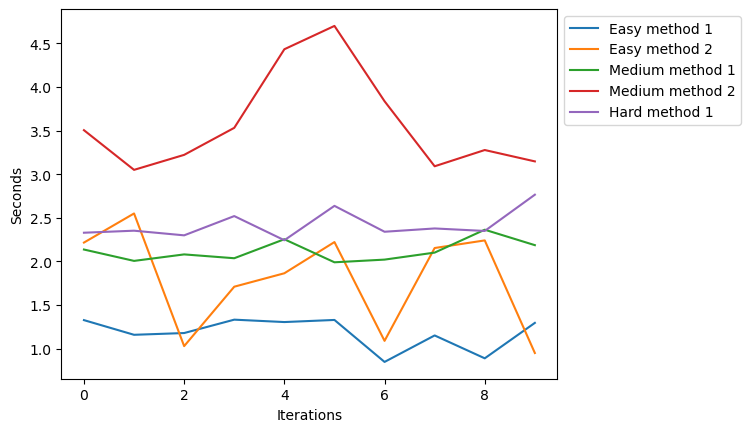

In [59]:
plt.plot(times_easy_method1, label = "Easy method 1")
plt.plot(times_easy_method2, label = "Easy method 2")
plt.plot(times_medium_method1, label = "Medium method 1")
plt.plot(times_medium_method2, label = "Medium method 2")
plt.plot(times_hard_method1, label = "Hard method 1")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.ylabel("Seconds")
plt.xlabel("Iterations")

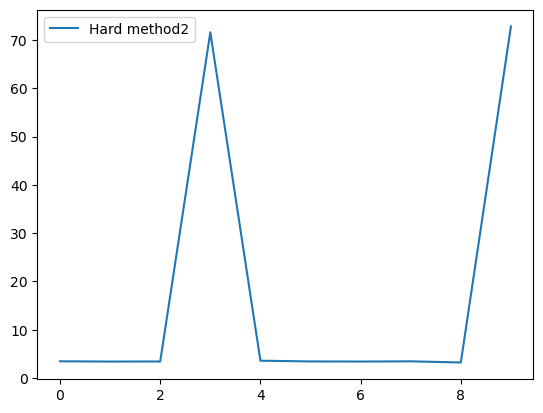

In [60]:
plt.plot(times_hard_method2, label = "Hard method2")
plt.legend()

In conclusion, my genetic algorithm works really well for easy sudokus. Medium ones need some work and hard ones are terrible. If I were to write a working code, I don't think I would use GA for the amount of knowledge I have at this moment. The best way to code effitient and fast sudoku solver is by using backtracking which I wasn't able to implement here, at least for now - providing GA library even allows one to implement one. Again, I found little to no information on that matter.

However, I am content that I was able to upgrade my code so that it solves larger amount of correct answers. 